plot the trajectory of gradient descent with the data 
$$ A = \begin{bmatrix} 1 & 2\\ 2 & 1 \\-1 & 0 \end{bmatrix}   ;   B = \begin{bmatrix} 1\\-1\\0 \end{bmatrix}$$
The Python code below implements the gradient descent algorithm above. The stopping criteria used is that the residual rk becomes smaller than the tolerance in the 2-norm.

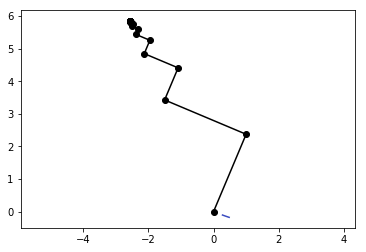

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# The function graddesc performs the gradient descent algorithm with starting value x and tolerance tol
def graddesc(A, b, x, tol):
    """
    Input: matrix A, vector b, vector x, tolarance tol
    Output: trajectory of points x_0,x_1,... of the gradient descent method
    """
    # Compute the negative gradient r = A^T(b-Ax)
    r = np.dot(A.transpose(),b-np.dot(A,x))
    # Start with an empty array
    xout = [x]
    while la.norm(r,2) > tol:
        # If the gradient is bigger than the tolerance
        Ar = np.dot(A,r)
        alpha = np.dot(r,r)/np.dot(Ar,Ar)
        x = x + alpha*r
        xout.append(x)
        r = r-alpha*np.dot(A.transpose(),Ar)
    return np.array(xout).transpose()

# Define the matrix A and the vector b for the problem we consider, as well as the zero starting point
A = np.array([[1,2], [2,1], [-1,0]])
b = np.array([10, -1, 0])
tol = 1e-4
x = np.zeros(2)

# Call the gradient descent function with input A and with starting value x=0
traj = graddesc(A, b, x, tol)

# Plot
%matplotlib inline

# Define the function we aim to minimize
def f(x):
    return np.dot(np.dot(A,x)-b,np.dot(A,x)-b)

# Determine the values of the function for the first 7 steps
# This is used to specify the location of the level sets
fvals = []
for i in range(7):
    fvals.append(f(traj[:,i]))
    
# Create a mesh grid for plotting the contours / level sets 
xx = np.linspace(0.1,0.5,100)
yy = np.linspace(-0.5,-0.1,100)
X, Y = np.meshgrid(xx, yy)
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = f(np.array([X[i,j], Y[i,j]]))

# Get a nice monotone colormap
cmap = plt.cm.get_cmap("coolwarm")

# Plot the contours and the trajectory
plt.contour(X, Y, Z, cmap = cmap, levels = list(reversed(fvals)))
plt.plot(traj[0,:], traj[1,:], 'o-k')
#plt.axis('off')
plt.xlim([0.1,0.5])
plt.ylim([-0.5,-0.15])
plt.axis('equal')
plt.show()